Import the BCC data into a pandas dataframe

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
bccdf = pd.read_csv('breast-cancer-wisconsin.data')
bccdf

,SampleCode,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [4]:
bccdf.dtypes

SampleCode                      int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
bccdf['Bare Nuclei'].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [6]:
bccdf = bccdf[bccdf['Bare Nuclei'] != '?'] #bccdf where its category bare nuclei doesnt equal an unknown
bccdf

,SampleCode,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [7]:
bccdf.dropna() ##Remove missing values.

,SampleCode,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


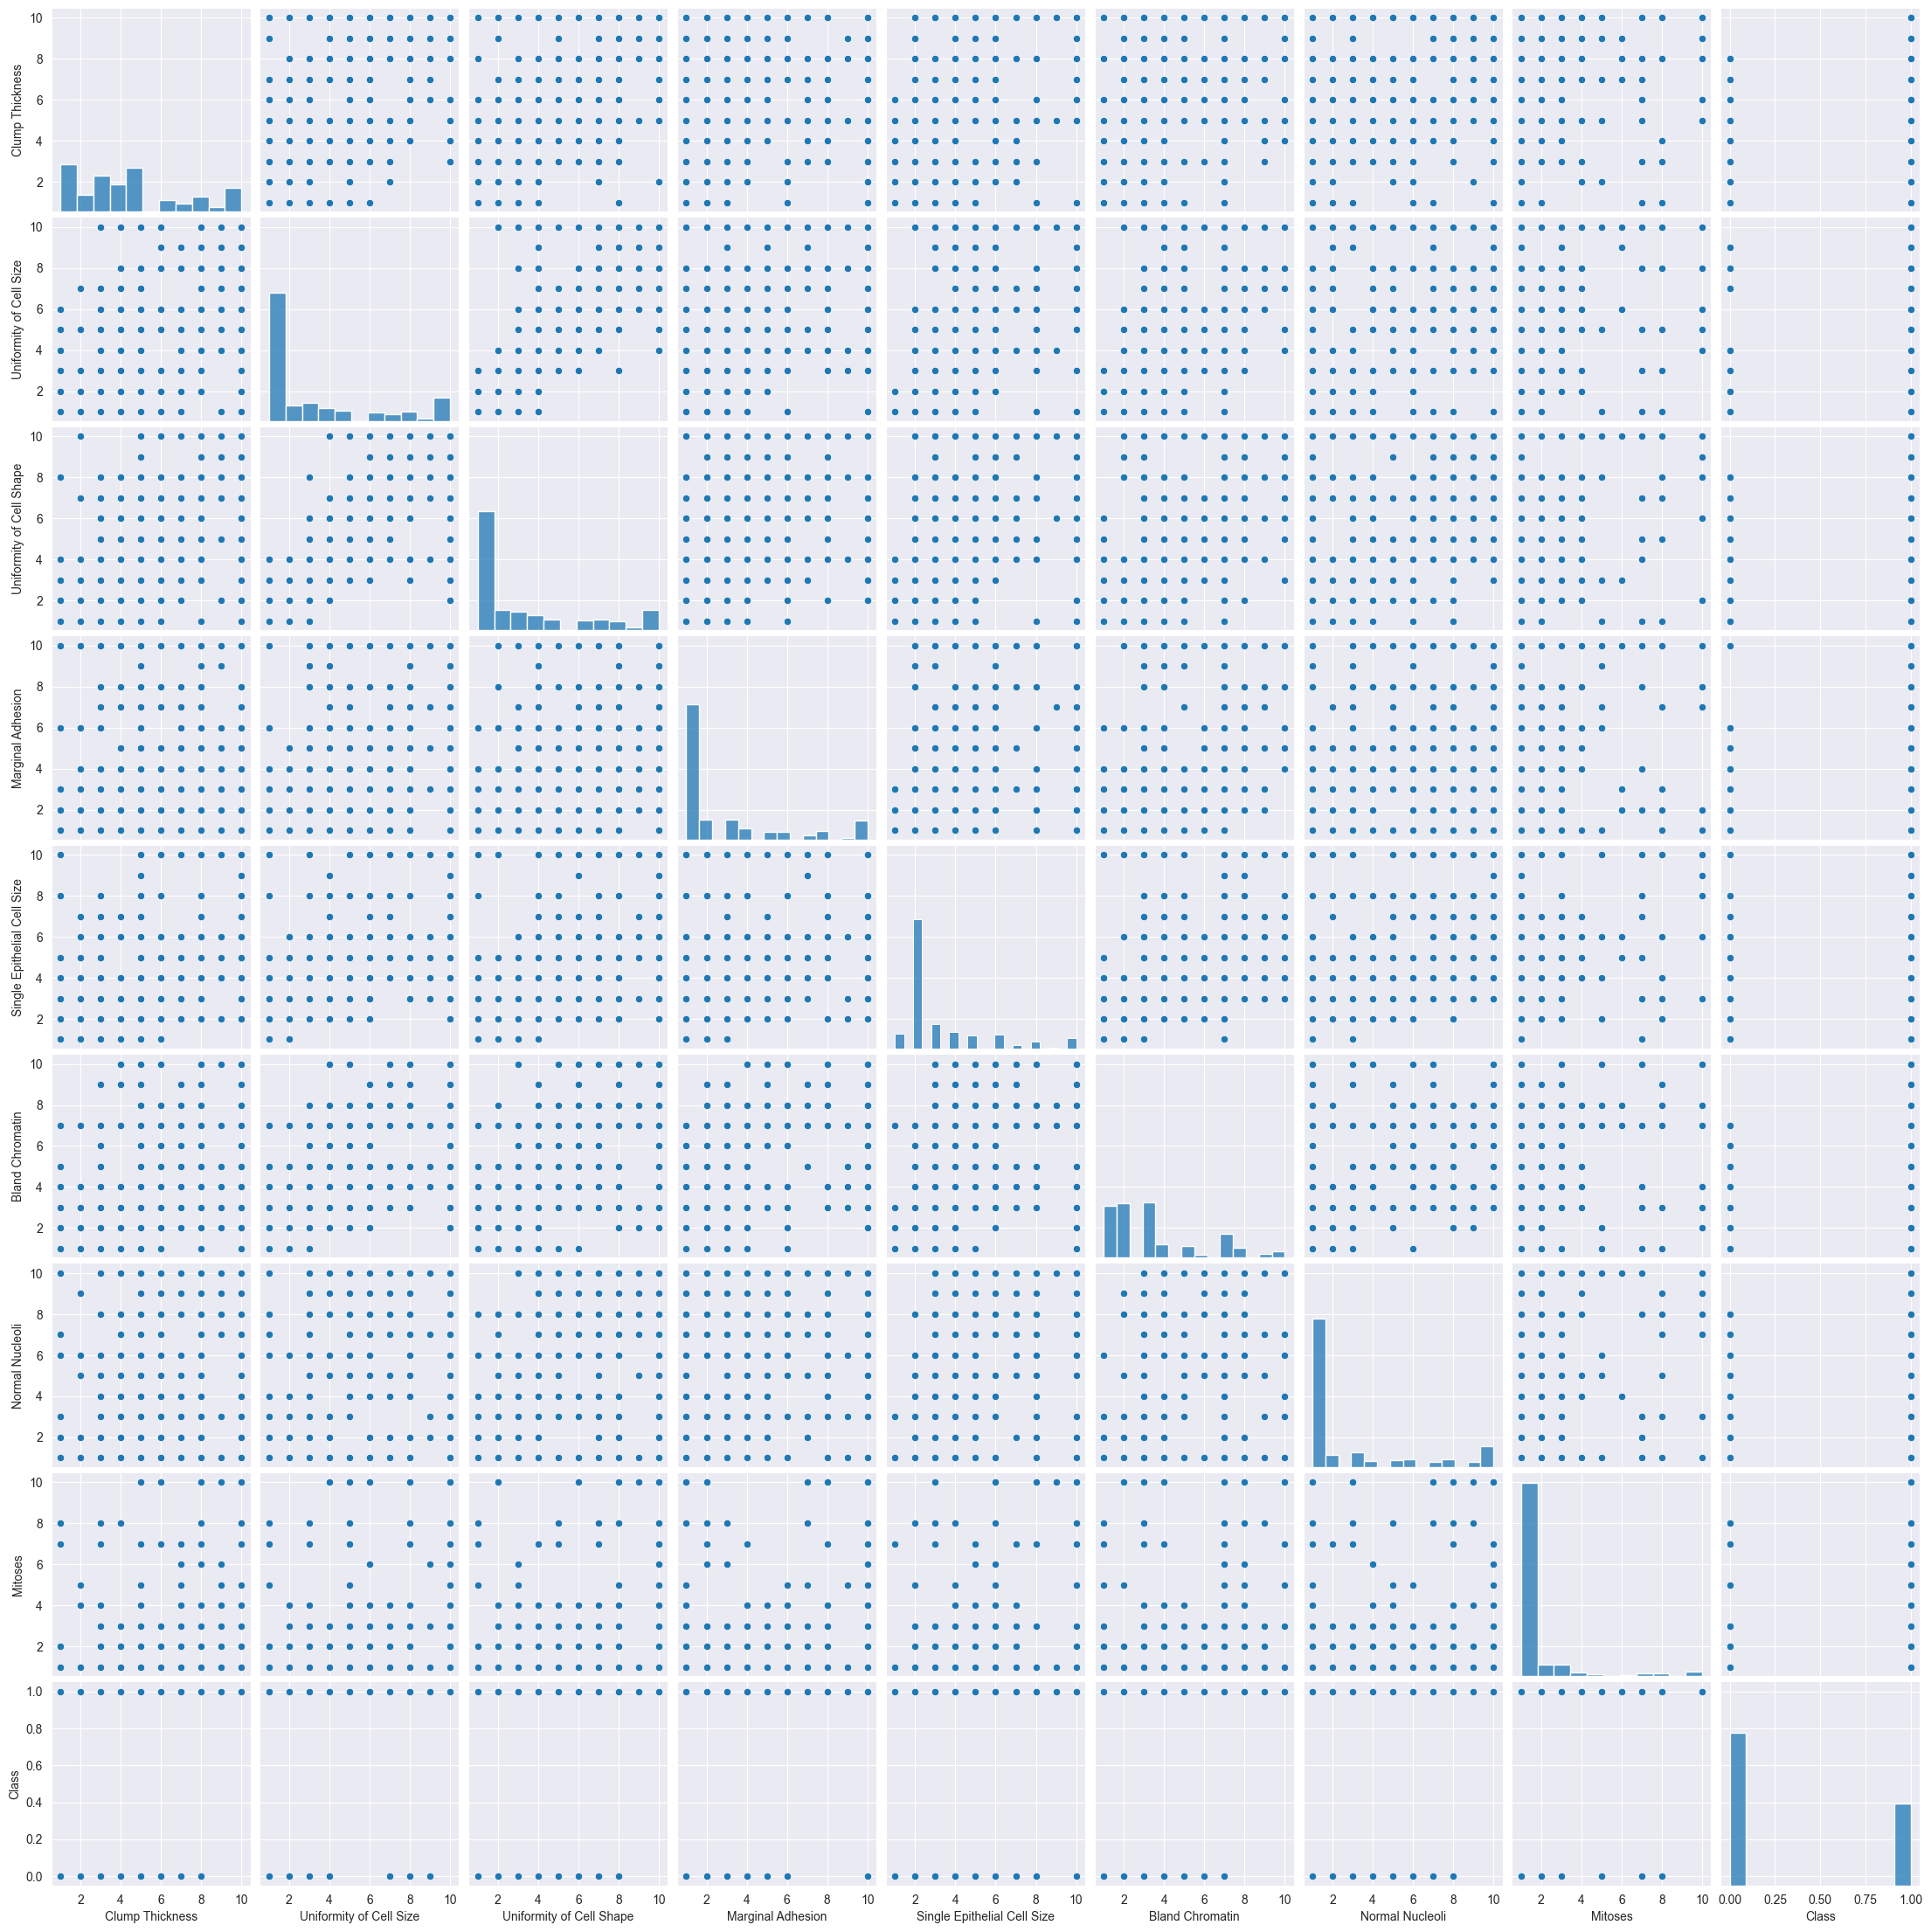

In [8]:
bccdf = bccdf.drop(columns = ['SampleCode'])
bccdf.Class = (bccdf.Class - 2)/2
sns.pairplot(bccdf)

<AxesSubplot: >

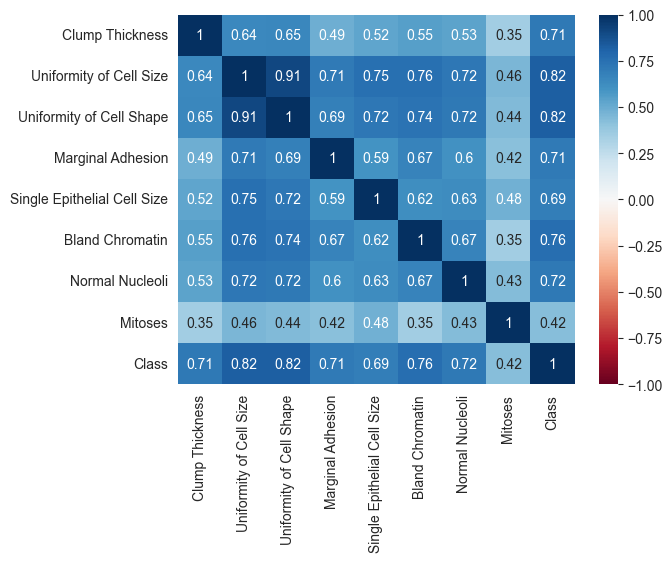

In [9]:
corr = bccdf.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True, cmap= 'RdBu')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(bccdf.drop(['Class'], axis=1), bccdf.Class, test_size=0.2, random_state=21)

In [11]:
X_train

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
115,1,1,1,1,2,5,1,1,1
59,9,5,5,2,2,2,5,1,1
111,8,6,4,3,5,9,3,1,1
609,5,1,1,1,2,1,1,1,1
446,1,1,1,1,2,1,1,1,1
...,...,...,...,...,...,...,...,...,...
434,6,9,7,5,5,8,4,2,1
122,10,10,10,2,10,10,5,3,3
382,3,2,2,2,2,1,3,2,1
50,9,5,8,1,2,3,2,1,5


In [12]:
y_train

115    0.0
59     1.0
111    1.0
609    0.0
446    0.0
      ... 
434    0.0
122    1.0
382    0.0
50     1.0
213    1.0
Name: Class, Length: 546, dtype: float64

### Linear Regression

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [15]:
reg.coef_

array([0.03052106, 0.02897114, 0.01509576, 0.01302417, 0.00788995,
       0.04337238, 0.01392089, 0.01546489, 0.00422993])

In [16]:
yhat_train = reg.predict(X_train)
yhat_test = reg.predict(X_test)

In [17]:
print('\nMean squared error: %.2f' % mean_squared_error(y_train, yhat_train))
print('\nMean squared error: %.2f' % mean_squared_error(y_test, yhat_test))


Mean squared error: 0.04

Mean squared error: 0.04


In [18]:
from sklearn.metrics import classification_report

In [19]:
yhat_test[0:20]

array([ 0.80896461,  0.72549656, -0.06433751,  0.12207456,  0.02722568,
       -0.0417064 ,  1.11774731,  0.92077138,  0.17385386,  0.8428757 ,
        0.07284251,  0.96521767,  0.12741097, -0.04438569,  0.0106255 ,
       -0.05830658,  0.00704949,  0.84968703,  0.00671995, -0.05041663])

In [20]:
yhat_test2 = [ 1 if y>=0.5 else 0 for y in yhat_test ]
yhat_test2[0:20]

[1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0]

In [21]:
print(classification_report(y_test, yhat_test2))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        84
         1.0       1.00      0.92      0.96        53

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



### Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [24]:
yhat_test = logreg.predict(X_test)

In [25]:
logreg.score(X_test, y_test)

0.9708029197080292

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test, yhat_test))

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        84
         1.0       1.00      0.92      0.96        53

    accuracy                           0.97       137
   macro avg       0.98      0.96      0.97       137
weighted avg       0.97      0.97      0.97       137



In [28]:
logreg.coef_[0]

array([0.51189123, 0.07806344, 0.31837642, 0.33277616, 0.11420275,
       0.32199638, 0.4069301 , 0.16553989, 0.481485  ])

<AxesSubplot: >

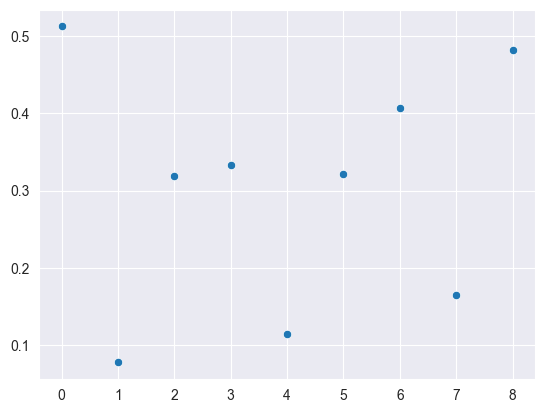

In [29]:
sns.scatterplot(x = list(range(0,len(logreg.coef_[0]))),y = logreg.coef_[0])

### Neural Nets

Now I'm going to use Keras to define a Neural network that will be trained off of this data. This Neural Network can then be used to predict future values for breast cancer presence. 

In [30]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 16, activation = 'relu', input_dim = 9))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

Once the Neural Network is defined, I now have to specify is the optimizer and loss function

In [31]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [32]:
X_train.astype(float)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
115,1.0,1.0,1.0,1.0,2.0,5.0,1.0,1.0,1.0
59,9.0,5.0,5.0,2.0,2.0,2.0,5.0,1.0,1.0
111,8.0,6.0,4.0,3.0,5.0,9.0,3.0,1.0,1.0
609,5.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
446,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
434,6.0,9.0,7.0,5.0,5.0,8.0,4.0,2.0,1.0
122,10.0,10.0,10.0,2.0,10.0,10.0,5.0,3.0,3.0
382,3.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,1.0
50,9.0,5.0,8.0,1.0,2.0,3.0,2.0,1.0,5.0


You now train the neural network using Classifier.fit, passing it the training data -- i.e. for this set of X, this is what the Y should look like. The NN will then spot the patterns in the data, and build a neural network that could replicate that. 

In [33]:
classifier.fit(X_train.astype(float), y_train, batch_size = 1, epochs = 100)

Epoch 1/100
546/546 [==============================] - 1s 897us/step - loss: 0.8851
Epoch 2/100
546/546 [==============================] - 1s 1ms/step - loss: 0.4551
Epoch 3/100
546/546 [==============================] - 0s 899us/step - loss: 0.3604
Epoch 4/100
546/546 [==============================] - 0s 893us/step - loss: 0.2986
Epoch 5/100
546/546 [==============================] - 0s 899us/step - loss: 0.2669
Epoch 6/100
546/546 [==============================] - 1s 954us/step - loss: 0.2402
Epoch 7/100
546/546 [==============================] - 0s 895us/step - loss: 0.2263
Epoch 8/100
546/546 [==============================] - 0s 883us/step - loss: 0.2209
Epoch 9/100
546/546 [==============================] - 0s 862us/step - loss: 0.1973
Epoch 10/100
546/546 [==============================] - 1s 900us/step - loss: 0.1795
Epoch 11/100
546/546 [==============================] - 1s 905us/step - loss: 0.2127
Epoch 12/100
546/546 [==============================] - 0s 868us/step - loss

To predict new values, the Neural Network uses classifier.predict. I'm going to pass it the test values for X (which the Neural Network hasn't previously seen) and it will give me back a set of predictions. These predicitons will be probabilities, so I will clean them up by saying that if thye are greater than .5, I'll make them 1, else I'll make them 0.

In [34]:
yhat_test = classifier.predict(X_test.astype(float))
print("yhat /n", yhat_test)
yy_test = y_test.astype(int).reset_index(drop = True)
print("yy_test /n", yy_test)


5/5 [==============================] - 0s 1ms/step
yhat /n [[9.99960184e-01]
 [9.75233257e-01]
 [6.96452815e-08]
 [1.99571042e-03]
 [1.16871217e-06]
 [9.37458537e-08]
 [9.99886215e-01]
 [9.99983072e-01]
 [2.93598958e-07]
 [9.99977410e-01]
 [2.34985191e-06]
 [9.99971628e-01]
 [1.59242583e-04]
 [5.69872043e-07]
 [7.27324107e-07]
 [2.68058841e-07]
 [9.41467590e-07]
 [9.98888969e-01]
 [8.51565716e-08]
 [6.26027656e-07]
 [1.53406563e-06]
 [1.00000000e+00]
 [1.00000000e+00]
 [2.20312222e-06]
 [9.99953270e-01]
 [9.99863446e-01]
 [1.08079398e-07]
 [9.99928057e-01]
 [1.00000000e+00]
 [7.47553941e-07]
 [9.99998093e-01]
 [9.54363465e-01]
 [8.93133521e-01]
 [9.99985874e-01]
 [1.13050794e-06]
 [8.83407235e-01]
 [2.18791297e-06]
 [9.20285529e-05]
 [4.45483311e-05]
 [5.74938994e-08]
 [9.99981105e-01]
 [9.99974966e-01]
 [2.68793337e-05]
 [4.98456416e-07]
 [2.21589071e-05]
 [1.13050794e-06]
 [4.23223853e-01]
 [9.99867260e-01]
 [8.83541020e-07]
 [1.35368680e-07]
 [1.16871217e-06]
 [9.93487835e-01]
 [6.2

In [35]:
for i in (0,1):
    for j in (0,1):
        myval = int((i and j) or (not (i or j)))
        print(str(i) + ' xnor ' + str(j) + ' = ' + str(myval))

0 xnor 0 = 1
0 xnor 1 = 0
1 xnor 0 = 0
1 xnor 1 = 1


In [36]:
#(i and j) or (not (i or j))
def xnor(i, j):
  return int((i and j) or (not (i or j)))

In [37]:
testdf = pd.DataFrame()
testdf['yhat_test'] = yhat_test
testdf['y_test'] = yy_test
testdf

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [ ]:
testdf['correct'] = testdf.apply(lambda x: xnor(x.yhat_test, x.y_test), axis=1)
testdf

In [ ]:
testdf.correct.sum()

Now we can loop through the set of predicitons for the test set (called Y_pred) and the actual values for the test set (celled Y_test), and see how alike they are -- if they are the same, I'll increment 'correct', otherwise I'll incrememnt 'wrong'. 

You'll see the result is 100% accurate, even though the neural network reported a lower accuracy than that. Why? 

In [ ]:
print("Total " + str(testdf.shape[0]))
print("Correct " + str(testdf.correct.sum()))
print("Wrong " + str(testdf.shape[0] - testdf.correct.sum()))

In [ ]:
((yhat_test - y_test)**2).sum()

In [ ]:
y_test.shape[0] - ((yhat_test - y_test)**2).sum()

In [ ]:
(y_test.shape[0] - ((yhat_test - y_test)**2).sum())/y_test.shape[0]